# DQN (FNN) on Cartpole-v0



![title](https://cdn-images-1.medium.com/max/800/1*G_whtIrY9fGlw3It6HFfhA.gif)


Game: A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright.

-----

DQN is considered in cartpole-v0. It is implemented as a 2-alyer MLP (4-20-20-2, #parameters=562), optimizaed using Adam algorithm (lr=0.0001). 

Bellman Equation for optimal Q-value: for a given state (s) and action (a), $Q(s,a)$ should represent the current reward (r) plus the maximum discounted ($\gamma$) future reward
\begin{align}
Q(s,a) = r + \gamma(max(Q(s’,a’))
\end{align}



We consider intrinsic dimension ranging from 1 to 500.

In [1]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def extract_num(lines0):
    average_reward = 0.0 
    num_episode    = 10000
    
    solved_str     = lines0[-4]


    if "solved" in solved_str:
        average_reward = float(lines0[-5].split( )[-1])
        num_episode    = float(lines0[-8].split( )[-1])+1
    else:
        average_reward = float(lines0[-4].split( )[-1])
        num_episode    = float(lines0[-7].split( )[-1])+1        

    return average_reward, num_episode


In [3]:
def extract_dim_reward(results_dir):
    # Dim: subspace dim
    # AR: averaged reward (last 100 eps.)
    # NE: num of episode to achieve reward 195

    # filename list of diary
    diary_names = []
    for subdir, dirs, files in os.walk(results_dir):
        if "fnn_cartpole0_" in subdir:
            # print subdir
            for file in files:
                if file == 'diary':
                    fname = os.path.join(subdir, file)
                    diary_names.append(fname)

    # print diary_names   

    dim = []
    for f in diary_names:
        # print f
        tmp_str = f.split('/')[3]
        d = int(tmp_str.split('_')[2])
        # if d not in dim:
        dim.append(d)

    dim = sorted(dim)  

    # print dim

    diary_names_ordered = []
    for d in dim:
        for f in diary_names:
            if '_'+str(d)+'/' in f:
                # print "%d is in" % d + f
                diary_names_ordered.append(f)           

    # intrinsic update method
    Dim= []
    AR = []
    NE = []

    for fname in diary_names_ordered:
        tmp_str = fname.split('/')[3]
        d = int(tmp_str.split('_')[2])
        with open(fname,'r') as ff:
            lines0 = ff.readlines()

            try: 
                average_reward, num_episode = extract_num(lines0)
                # print "%d dim:\n"%dim[i] + str(average_reward) + ' '+ str(num_episode) + "\n"

                Dim.append(d)
                AR.append(average_reward)
                NE.append(num_episode)
            except ValueError:
                # print "%d dim:\n"%dim[i] + "Error \n"
                pass

    return Dim, AR, NE

# Dim= np.array(Dim)
# AR = np.array(AR)
# NE = np.array(NE)

In [108]:
Dim, AR, NE = [],[],[]

results_dir = '../results/rl_fnn_dqn_cartpole'
Dim_, AR_, NE_= extract_dim_reward(results_dir)

Dim = Dim + Dim_
AR  = AR + AR_ 
NE = NE + NE_   

results_dir = '../results/rl_fnn_dqn_cartpole_run1'
Dim_, AR_, NE_= extract_dim_reward(results_dir)

Dim = Dim + Dim_
AR  = AR + AR_ 
NE = NE + NE_   

fnn_cartpole_3_2_20

results_dir = '../results/rl_fnn_dqn_cartpole_run2'
Dim_, AR_, NE_= extract_dim_reward(results_dir)

Dim = Dim + Dim_
AR  = AR + AR_ 
NE = NE + NE_   


# results_dir = '../fnn_cartpole_3_2_20'
# Dim_, AR_, NE_= extract_dim_reward(results_dir)

# Dim = Dim + Dim_
# AR  = AR + AR_ 
# NE = NE + NE_  



NameError: name 'fnn_cartpole_3_2_20' is not defined

## Performance comparison with Baseline

Total Reward: we can just run an episode until the pole drops and see how much reward we got, ie, how many time step before the pole drops.

Besed on this, we have two metrics for evaluating the performance of the learned policy.

1. **Best 100-episode average reward**: CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials. The ideal 100-episode average reward for CartPole-v0 is 200.00 ± 0.00.

2. **Sample Complexity**: Running the method 10000 times, keeping track of how many episodes it took until the agent kept the pole up for 195.0 over 100 consecutive trials


[ 195.21  195.04  195.18    9.89    9.88   24.46   30.75    9.77   10.03
    9.91   10.1    10.09    9.88    9.88    9.73   21.21   21.96   58.14
   49.75   45.47   14.62   44.21  195.43   20.49   63.35   86.96  195.32
  195.    195.29  195.3   195.37  195.25  195.08  195.23  195.18  195.52
  195.07  195.08  195.18  195.04  148.93  195.02  196.03  195.69  195.04
  195.09  195.68  151.24  195.07  136.3   110.37  107.39  195.95  195.1
   94.79  195.02  195.49  111.74  195.04  195.66  118.98  116.63  106.55
  116.96   98.59  195.05  195.03  116.79   87.43   99.55  195.4   112.36]
[  0   0   0   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8
   8   9   9  10  10  15  15  20  20  25  25  30  30  35  35  40  40  45
  45  50  50  75 100 125 125 150 150 175 175 200 200 225 250 250 275 275
 300 300 325 325 350 350 375 375 400 400 425 425 450 450 475 475 500 500]
Standard Scale:


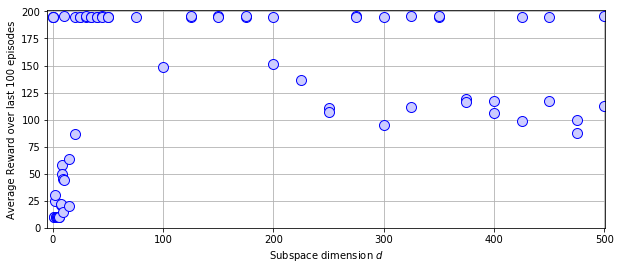

Log Scale:


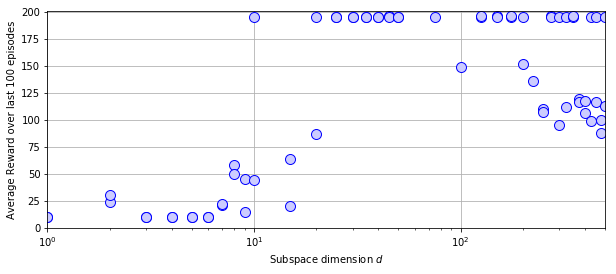

In [109]:
idx = sorted(range(len(Dim)), key=lambda k: Dim[k])
AR = np.array([ AR[i] for i in idx ])
NE = np.array([ NE[i] for i in idx ])
Dim = np.array([ Dim[i] for i in idx ])

print AR
print Dim


print "Standard Scale:"
fig, ax = subplots(figsize=(10,4) )
plot(Dim, AR, 'o', mec='b', mfc=(.8,.8,1) , ms=10)

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_ylim(0, 201)
ax.set_xlim(-5, 501)
plt.grid()
plt.show()


print "Log Scale:"
fig, ax = subplots(figsize=(10,4) )                  
plot(Dim, AR, 'o', mec='b', mfc=(.8,.8,1) , ms=10)

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_xscale('log')
ax.set_ylim(0, 201)
ax.set_xlim(0, 501)
plt.grid()
plt.show()

In [84]:


Dim_unique = list(set(Dim))

AR_m, NE_m, AR_std, NE_std, AR_max, NE_max = [],[],[],[],[],[]
for i in Dim_unique:
    
    idx = np.where( Dim == i)[0]
    AR_ =  np.array([ AR[i] for i in idx ])
    NE_ =  np.array([ NE[i] for i in idx ])
    
    AR_m_, NE_m_ = AR_.mean(), NE_.mean()
    AR_std_, NE_std_ = AR_.std(), NE_.std()
    AR_max_, NE_max_ = AR_.max(), NE_.max()
    
    AR_m.append(AR_m_) 
    NE_m.append(NE_m_) 
    AR_std.append(AR_std_)
    NE_std.append(NE_std_) 
    AR_max.append(AR_max_) 
    NE_max.append(NE_max_)
     
print AR_max
        
i, = np.where( Dim==0 )
idx = AR[i].argmax()
bl_dim= Dim[idx]
bl_ar = AR[idx]
bl_ne = NE[idx]

nn = len(Dim)
Dim_, AR_, NE_= Dim[2:], AR[2:], NE[2:]
idx1 = np.where(AR_>bl_ar*0.9)
idx2 = np.where(AR_<bl_ar*0.9)

print idx2[0]

print "Baseline yields average reward %f in %d episodes \n"%(bl_ar,bl_ne)
print "The following dimension outperforms 0.9*baseline: \n" + str(Dim_[idx1])
print "\nDimension %d yields average reward %f in %d episodes \n"%(Dim_[idx1[0][0]],AR_[idx1[0][0]],NE_[idx1[0][0]])

[ 195.18    9.88   30.75   10.03   10.1     9.88    9.73   21.96   49.75
   14.62  195.43   63.35  195.32  195.29  195.37  195.08  195.18  195.07
  195.18  195.04  196.03  195.04  195.68  195.07  136.3   107.39  195.1
  195.02  111.74  195.66  116.63  116.96  195.05  116.79   99.55  112.36]
[  0   1   2   3   4   5   6   7   8   9  10  15  20  25  30  35  40  45
  50  75 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500]
[195.18000000000001, 9.8800000000000008, 30.75, 10.029999999999999, 10.1, 9.8800000000000008, 9.7300000000000004, 21.960000000000001, 49.75, 14.619999999999999, 195.43000000000001, 63.350000000000001, 116.95999999999999, 195.09999999999999, 195.31999999999999, 195.03999999999999, 195.28999999999999, 195.37, 195.08000000000001, 195.18000000000001, 195.05000000000001, 195.02000000000001, 195.06999999999999, 195.68000000000001, 195.18000000000001, 116.79000000000001, 111.73999999999999, 195.06999999999999, 195.03999999999999, 99.549999999999997, 195.66, 136.

### Best 100-episode average reward

Standard Scale:


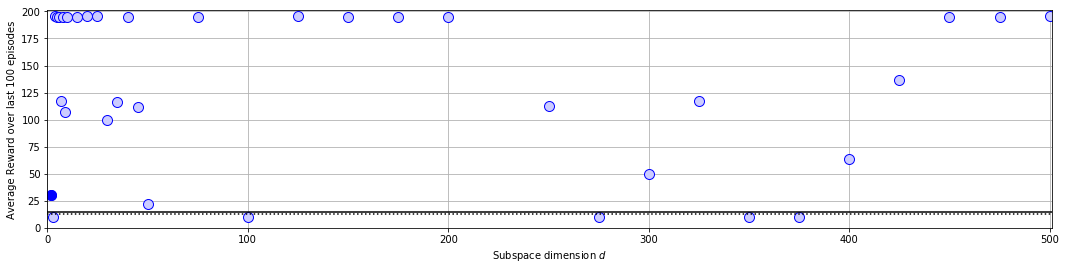

Log Scale:


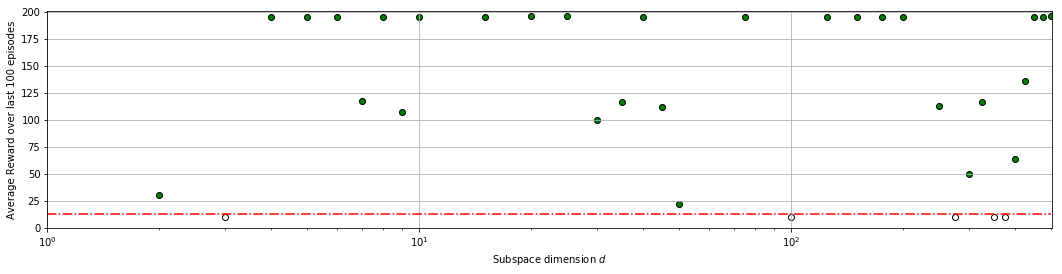

In [43]:
print "Standard Scale:"
fig, ax = subplots(figsize=(10,4) )

plot(Dim_, AR_, 'o', mec='b', mfc=(.8,.8,1) , ms=10)
plot(Dim_[idx1[0][0]], AR_[idx1[0][0]], 'o', mec='b', mfc='b', ms=10)

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_ylim(0.0, 201)
ax.set_xlim(0.0, 501)
plt.grid()
plt.show()


print "Log Scale:"
fig, ax = subplots(figsize=(10,4) )                  
plt.scatter(Dim_[idx1], AR_[idx1], edgecolor="k", facecolor="g" )
plt.scatter(Dim_[idx2], AR_[idx2], edgecolor="k", facecolor="w" )
ax.plot(Dim, bl_ar*np.ones(nn)*0.9,'r-.', label="Testing: baseline")
ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_xscale('log')
ax.set_ylim(0.0, 201)
ax.set_xlim(0.0, 501)
# ax.xaxis.set_ticks(np.arange(0,201,1))


plt.grid()

### Sample Complexity

Standard Scale:


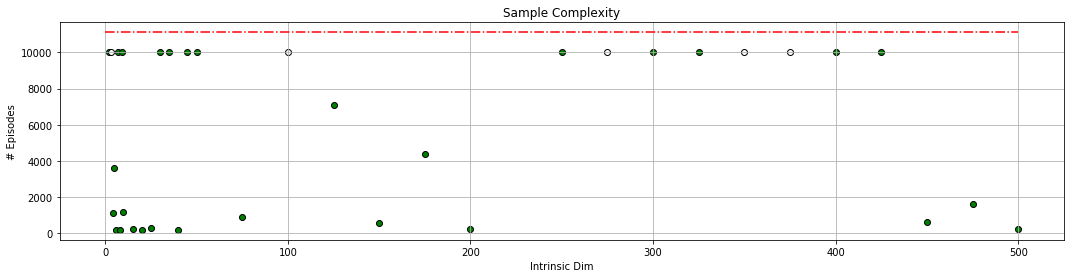

Log Scale:


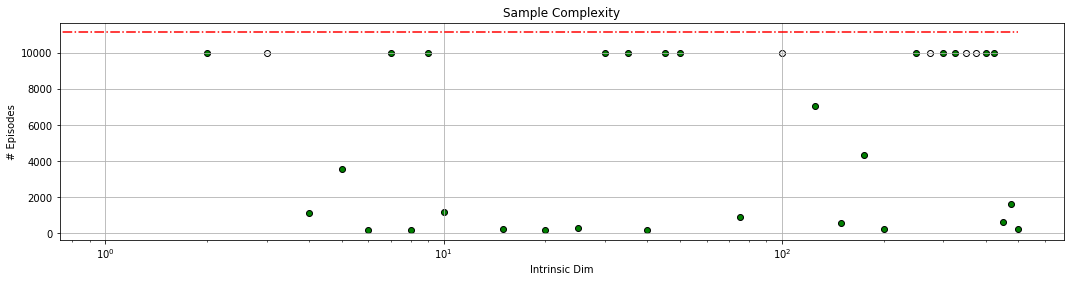

In [19]:
print "Standard Scale:"
fig, ax = subplots(figsize=(18,4) )              
plt.scatter(Dim_[idx1], NE_[idx1], edgecolor="k", facecolor="g" )
plt.scatter(Dim_[idx2], NE_[idx2], edgecolor="k", facecolor="w" )
ax.plot(Dim, bl_ne*np.ones(nn)/0.9,'r-.', label="Testing: baseline")
ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('# Episodes')
ax.set_title('Sample Complexity')
plt.grid()
plt.show()

print "Log Scale:"
fig, ax = subplots(figsize=(18,4) )              
plt.scatter(Dim_[idx1], NE_[idx1], edgecolor="k", facecolor="g" )
plt.scatter(Dim_[idx2], NE_[idx2], edgecolor="k", facecolor="w" )
ax.plot(Dim, bl_ne*np.ones(nn)/0.9,'r-.', label="Testing: baseline")
ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('# Episodes')
ax.set_title('Sample Complexity')
ax.set_xscale('log')
plt.grid()

### Conclusion:

* Cartpole-v0 can be solved in a lower space with less samples.



***

#### Notes:

Decision to make: Define the effective metrics to in RL problems?

Future works:
    1. The results seem not stable, multiple runs are needed for each configuration
    2. Consider other deep RL setups: 
        (1) Policy Gradient (TRPO and/or A3C)? 
        (2) Q: How to deal with the case when two networks are employed in pipeline (Actor-Critic)?
    3. Move to the Atari/MuJoCo games
    4. CNN for raw pixel inputs --> sparse transformation is needed ! (High priority)
    5. RNN models for sentiment analysis or language modeling.


    

In [4]:
def extract_num_opus(lines0):
    average_reward = 0.0 
    num_episode    = 10000
    
    solved_str     = lines0[-4]


    if "solved" in solved_str:
        average_reward = float(lines0[-5].split( )[-1])
        num_episode    = float(lines0[-8].split( )[-1])+1
    else:
        average_reward = float(lines0[-4].split( )[-1])
        num_episode    = float(lines0[-7].split( )[-1])+1        

    return average_reward, num_episode


def extract_dim_reward_opus(results_dir, version, width, repeat):
    # Dim: subspace dim
    # AR: averaged reward (last 100 eps.)
    # NE: num of episode to achieve reward 195

    # filename list of diary
    diary_names = []
    for subdir, dirs, files in os.walk(results_dir):
        if ("_lrb_fnn_CartPole-v"+str(version)+"_" in subdir) and ("_"+str(width)+"_" in subdir):
            # print subdir
            for file in files:
                if file == 'diary':
                    fname = os.path.join(subdir, file)
                    diary_names.append(fname)

    print "Number of diary files extracted: " + str(len(diary_names))
    # print diary_names
    #  
    dim =  []
    for f in diary_names:
        d = int(f.split('/')[-2].split('_')[-3])
        dim.append(d)

    dim = sorted(list(set(dim)))  

    print "Number of subspaces tested: " + str(len(dim))
    print dim

    diary_names_ordered = []
    for d in dim:
        for r in range(repeat):
            config = 'v'+str(version)+'_'+str(d)+'_'+str(width)+"_"+str(r+1)
            # print config
            for f in diary_names:
                if config in f:
                    # print "%d is in" % d + f
                    diary_names_ordered.append(f)           

    print len(diary_names_ordered)  
    
    # print diary_names_ordered
    # intrinsic update method
    Dim= []
    AR = []
    NE = []

    for fname in diary_names_ordered:
        d = int(fname.split('/')[-2].split('_')[-3])
        r = int(fname.split('/')[-2].split('_')[-1])
        
        with open(fname,'r') as ff:
            lines0 = ff.readlines()

            try: 
                average_reward, num_episode = extract_num_opus(lines0)
                # print "%d dim:\n"%d + str(average_reward) + ' '+ str(num_episode) + "\n"

                Dim.append(d)
                AR.append(average_reward)
                NE.append(num_episode)
            except ValueError:
                # print "%d dim:\n"%dim[i] + "Error \n"
                pass

    return Dim, AR, NE

# Dim= np.array(Dim)
# AR = np.array(AR)
# NE = np.array(NE)

In [5]:
Dim, AR, NE = [],[],[]

results_dir = '/home/users/chunyuan.li/public_results/chun/rl_results'
version = 0
width = 20
repeat = 5
Dim_20, AR_20, NE_20= extract_dim_reward_opus(results_dir, version, width, repeat)

results_dir = '/home/users/chunyuan.li/cli/lab0/exp/low_rank_basis/results/dqn_results'
Dim_20_r, AR_20_r, NE_20_r = extract_dim_reward_opus(results_dir, version, width, repeat)


Number of diary files extracted: 205
Number of subspaces tested: 40
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45, 50, 125, 150, 175, 225, 250, 275, 325, 350, 375, 425, 450, 475, 500]
200
Number of diary files extracted: 20
Number of subspaces tested: 4
[21, 22, 23, 24]
20


In [275]:
Dim_20, AR_20, NE_20 = Dim_20+Dim_20_r, AR_20+AR_20_r, NE_20+NE_20_r

idx = sorted(range(len(Dim_20)), key=lambda k: Dim_20[k])
Dim_20 = sorted(Dim_20)
AR_20 = [AR_20[i] for i in idx]
NE_20 = [NE_20[i] for i in idx]

Dim = sorted(list(set(Dim_20)))
print Dim

for i in range(len(Dim_20)):
    if AR_20[i]>195.0 and i>5:
        solved_dim_20, solved_ar_20 = Dim_20[i], AR_20[i]
        print Dim_20[i]
        print AR_20[i]
        
        break
        
AR_20_mean, AR_20_std, NE_20_mean, NE_20_std  = [], [], [], [] 
for d in Dim:
    # print d
    ar_ = np.array([AR_20[i] for i,x in enumerate(Dim_20) if x==d])
    AR_20_mean.append(ar_.mean())
    AR_20_std.append(ar_.std())
    
    ne_ = np.array([NE_20[i] for i,x in enumerate(Dim_20) if x==d])
    NE_20_mean.append(ne_.mean())
    NE_20_std.append(ne_.std())    

AR_20_mean, AR_20_std = np.array(AR_20_mean), np.array(AR_20_std) 
NE_20_mean, NE_20_std = np.array(NE_20_mean), np.array(NE_20_std)    
print   AR_20_mean   
print   NE_20_mean   
print   NE_20_std    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 35, 40, 45, 50, 125, 150, 175, 225, 250, 275, 325, 350, 375, 425, 450, 475, 500]
22
195.05
[ 195.194     9.768    16.7675   10.02     24.462     9.872    10.506
   21.882    80.2575   28.398    50.676    49.682    57.662    94.915
   51.42     57.622    88.8      91.576    71.44     91.48     81.342
  107.012   164.206   127.96    146.934   177.24    184.794   195.266
  195.386   195.28    195.174   195.206   195.288   195.39    195.292
  162.132   173.31    151.662   132.472   176.784   143.108   178.646
  110.572   133.96  ]
[   873.8  10000.   10000.   10000.   10000.   10000.   10000.   10000.
  10000.   10000.   10000.   10000.   10000.   10000.   10000.   10000.
  10000.   10000.   10000.   10000.   10000.   10000.    6119.    7248.6
   8693.8   3955.2   3282.    1702.6   1860.    1103.2   1468.4    445.2
    768.6   2893.6   1557.2   4129.2   5032.6   6073.8   8035.    2943.4
   80

Standard Scale:


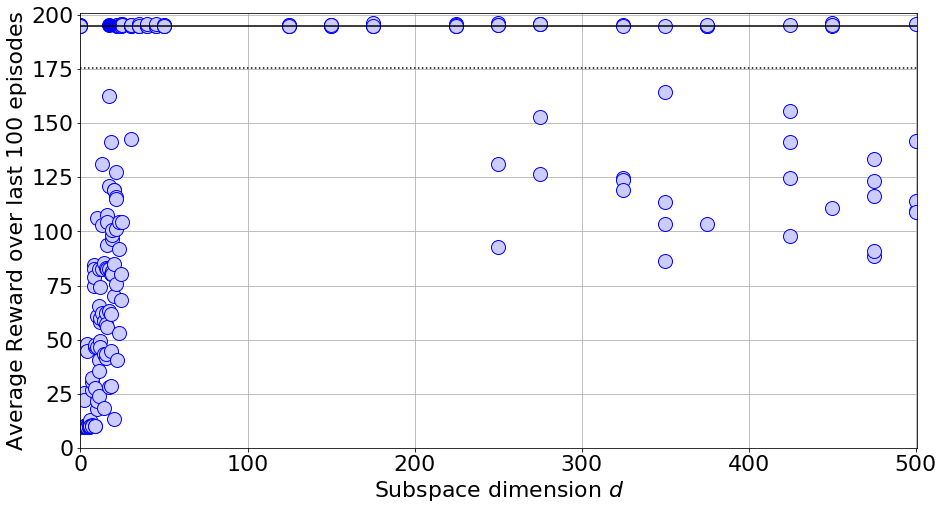

Log Scale:


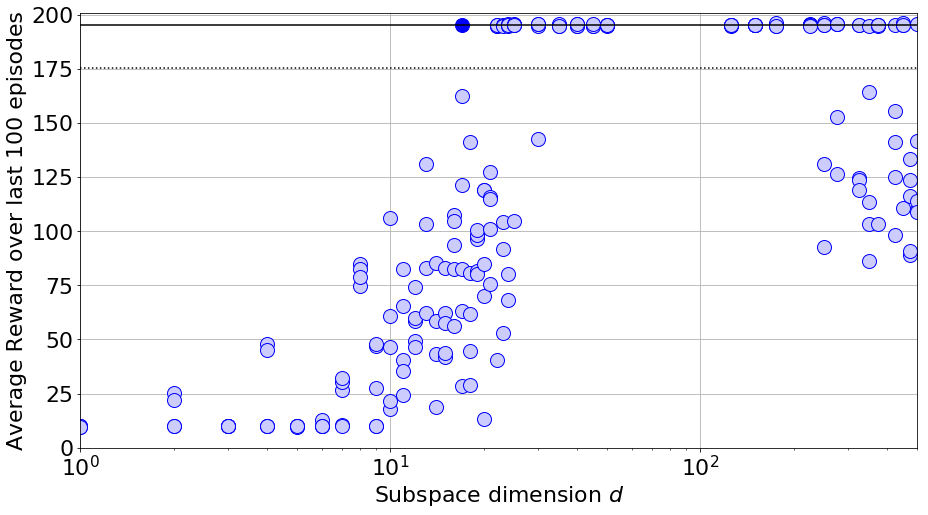

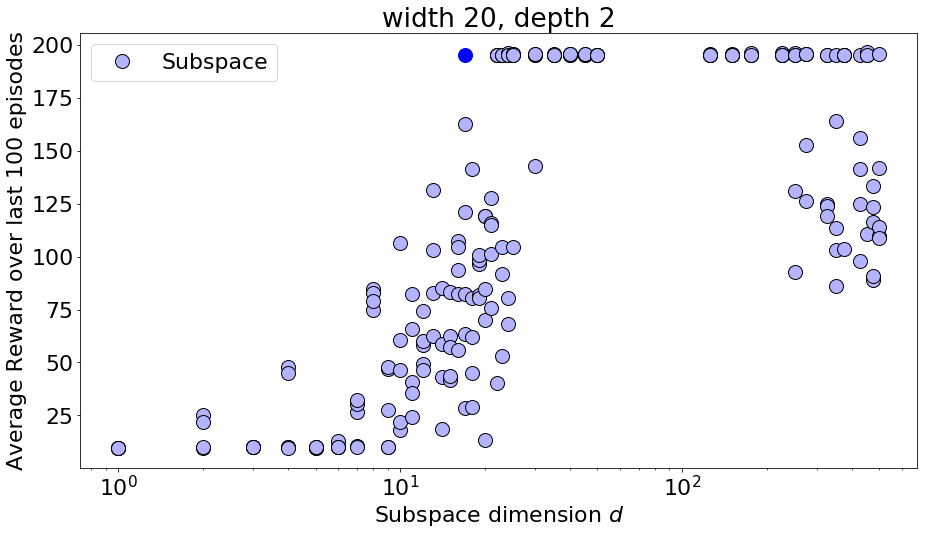

In [268]:
Dim_, AR_, NE_ = Dim_20, AR_20, NE_20


print "Standard Scale:"
fig, ax = subplots(figsize=(15, 8) )

plot(Dim_, AR_, 'o', mec='b', mfc=(.8,.8,1) , ms=14)
plot(solved_dim, solved_ar, 'o', mec='b', mfc='b', ms=14)

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_ylim(0.0, 201)
ax.set_xlim(0.0, 501)
plt.grid()
plt.show()


print "Log Scale:"
fig, ax = subplots(figsize=(15, 8) )              
semilogx(Dim_, AR_,  'o', mec='b', mfc=(.8,.8,1) , ms=14 )
semilogx(solved_dim, solved_ar,  'o', mec='b', mfc='b', ms=14 )

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_xscale('log')
ax.set_ylim(0.0, 201)
ax.set_xlim(0.0, 501)
# ax.xaxis.set_ticks(np.arange(0,201,1))
plt.grid()


fig, ax = subplots(figsize=(15, 8) )   

font = {'size'   : 22}
matplotlib.rc('font', **font)


# semilogx(Dim_, AR_, 'o', mfc=(.8,.8,.8), mec='k', ms=14, label='Direct')
semilogx(Dim_, AR_, 'o', mfc=(.7,.7,1), mec='k', ms=14, label='Subspace')
semilogx(solved_dim, solved_ar,  'o', mec='b', mfc='b', ms=14 )

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
ax.set_title('width 20, depth 2')
plt.legend()
fig.savefig('figs/dqn/cartpole_v0_size_20.pdf', bbox_inches='tight')
# savefig('figs/mnist_trainable_maxd_cmp_log.pdf', bbox_inches='tight')

In [269]:
Dim, AR, NE = [],[],[]

results_dir = '/home/users/chunyuan.li/public_results/chun/rl_results'
version = 0
width = 400
repeat = 5
Dim_400, AR_400, NE_400= extract_dim_reward_opus(results_dir, version, width, repeat)


results_dir = '/home/users/chunyuan.li/cli/lab0/exp/low_rank_basis/results/dqn_results'
Dim_400_r, AR_400_r, NE_400_r = extract_dim_reward_opus(results_dir, version, width, repeat)


Dim_400, AR_400, NE_400 = Dim_400+Dim_400_r, AR_400+AR_400_r, NE_400+NE_400_r

idx = sorted(range(len(Dim_400)), key=lambda k: Dim_400[k])
Dim_400 = sorted(Dim_400)
AR_400 = [AR_400[i] for i in idx]
NE_400 = [NE_400[i] for i in idx]

Dim = sorted(list(set(Dim_400)))
print Dim


for i in range(len(Dim_400)):
    if AR_400[i]>195.0 and i>5:
        solved_dim_400, solved_ar_400 = Dim_400[i], AR_400[i]
        print Dim_400[i]
        print AR_400[i]
        
        break
        
AR_400_mean, AR_400_std = [], [] 
for d in Dim:
    # print d
    ar_ = np.array([AR_400[i] for i,x in enumerate(Dim_400) if x==d])
    AR_400_mean.append(ar_.mean())
    AR_400_std.append(ar_.std())
AR_400_mean, AR_400_std = np.array(AR_400_mean), np.array(AR_400_std)        
print   AR_400_mean          

Number of diary files extracted: 200
Number of subspaces tested: 40
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45, 50, 125, 150, 175, 225, 250, 275, 325, 350, 375, 425, 450, 475, 500]
200
Number of diary files extracted: 20
Number of subspaces tested: 4
[21, 22, 23, 24]
20
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 35, 40, 45, 50, 125, 150, 175, 225, 250, 275, 325, 350, 375, 425, 450, 475, 500]
17
195.29
[ 187.182         9.946        10.01         53.338        21.814        31.014
   25.722        18.704        47.156        27.55         58.51         36.614
   46.384        66.558        72.734       106.082        86.26         80.816
  157.592        91.045       101.808       117.764       132.43        108.266
  164.926       106.748       132.322       169.788       195.124       189.532
  195.212       195.386       193.442       186.182       176.046       166.31
  165.67 

Standard Scale:


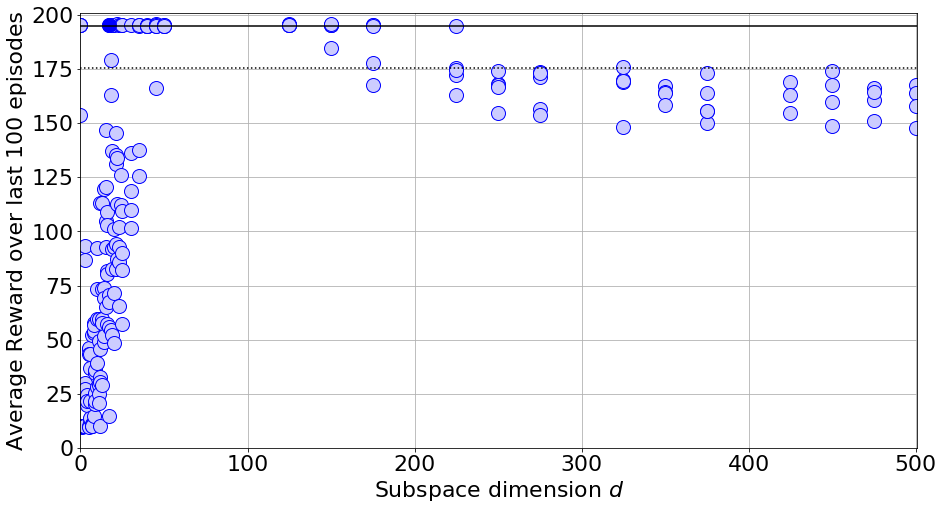

Log Scale:


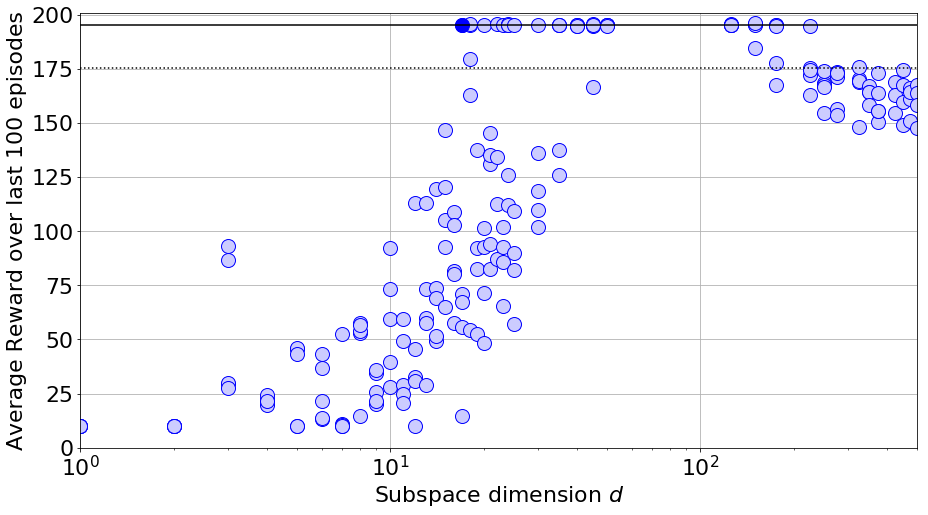

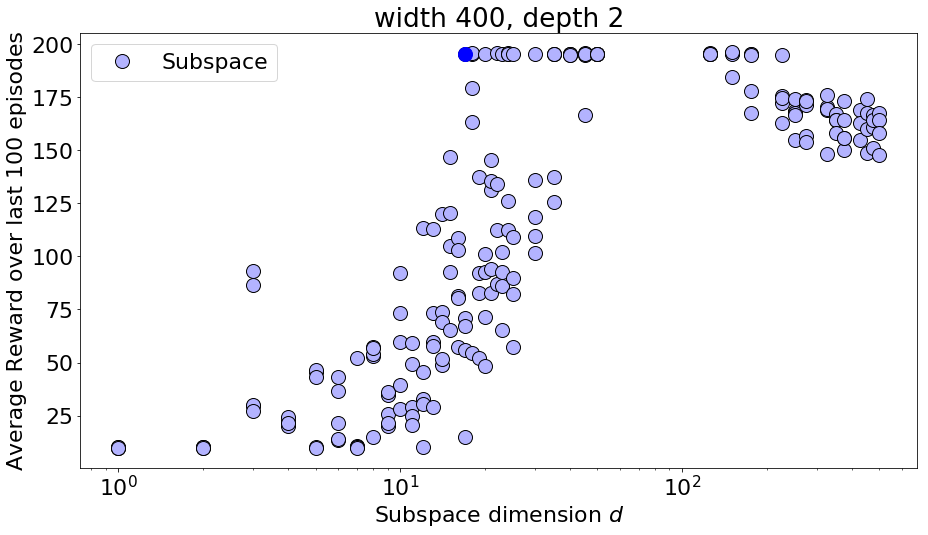

In [271]:
Dim_, AR_, NE_ = Dim_400, AR_400, NE_400

print "Standard Scale:"
fig, ax = subplots(figsize=(15, 8) )

plot(Dim_, AR_, 'o', mec='b', mfc=(.8,.8,1) , ms=14)
plot(solved_dim, solved_ar, 'o', mec='b', mfc='b', ms=14)

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_ylim(0.0, 201)
ax.set_xlim(0.0, 501)
plt.grid()
plt.show()


print "Log Scale:"
fig, ax = subplots(figsize=(15, 8) )              
semilogx(Dim_, AR_,  'o', mec='b', mfc=(.8,.8,1) , ms=14 )
semilogx(solved_dim, solved_ar,  'o', mec='b', mfc='b', ms=14 )

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_xscale('log')
ax.set_ylim(0.0, 201)
ax.set_xlim(0.0, 501)
# ax.xaxis.set_ticks(np.arange(0,201,1))
plt.grid()


fig, ax = subplots(figsize=(15, 8) )   

font = {'size'   : 22}
matplotlib.rc('font', **font)


# semilogx(Dim_, AR_, 'o', mfc=(.8,.8,.8), mec='k', ms=14, label='Direct')
semilogx(Dim_, AR_, 'o', mfc=(.7,.7,1), mec='k', ms=14, label='Subspace')
semilogx(solved_dim, solved_ar,  'o', mec='b', mfc='b', ms=14 )

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
ax.set_title('width 400, depth 2')
plt.legend()
fig.savefig('figs/dqn/cartpole_v0_size_400.pdf', bbox_inches='tight')
# savefig('figs/mnist_trainable_maxd_cmp_log.pdf', bbox_inches='tight')

Standard Scale:


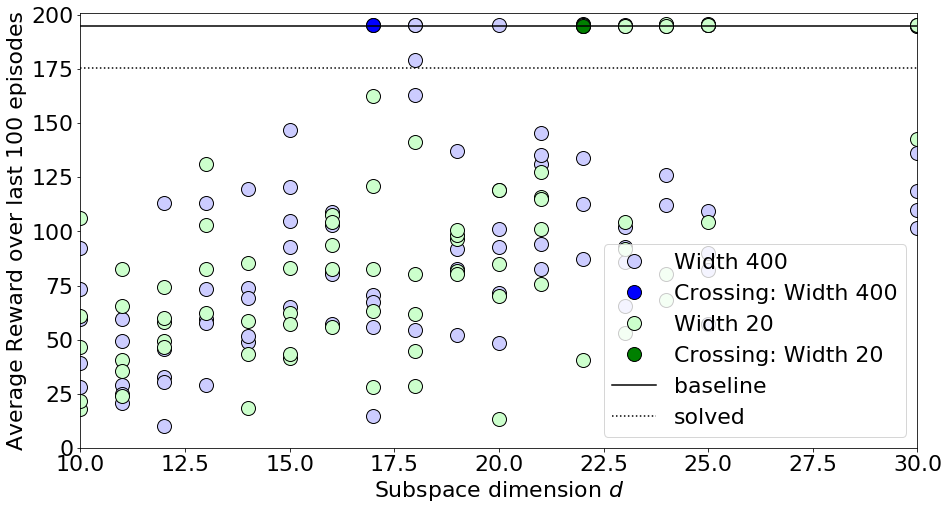

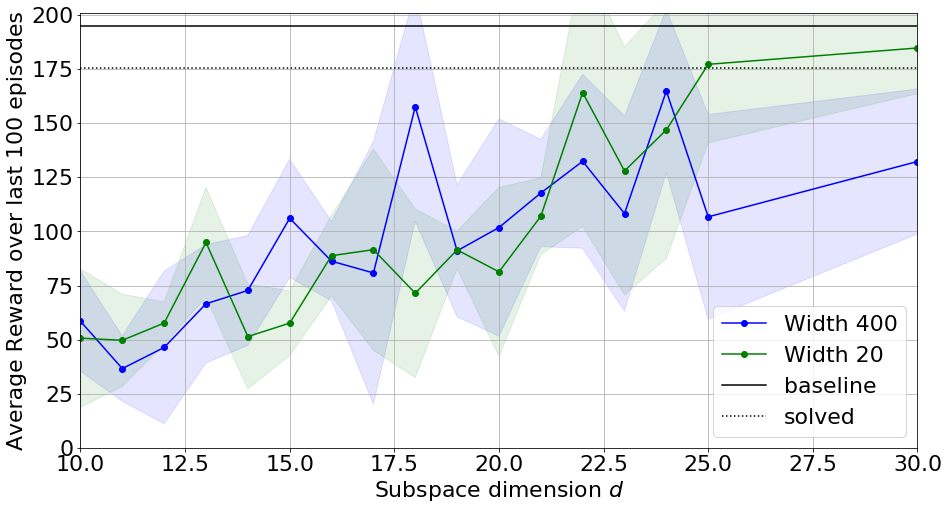

In [272]:
print "Standard Scale:"
fig, ax = subplots(figsize=(15, 8) )

Dim_, AR_, NE_ = Dim_400, AR_400, NE_400
plot(Dim_, AR_, 'o', mec='k', mfc=(.8,.8,1) , ms=14, label='Width 400')
plot(solved_dim_400, solved_ar_400, 'o', mec='k', mfc='b', ms=14, label='Crossing: Width 400')

Dim_, AR_, NE_ = Dim_20, AR_20, NE_20
plot(Dim_, AR_, 'o', mec='k', mfc=(.8,1,.8) , ms=14, label='Width 20')
plot(solved_dim_20, solved_ar_20, 'o', mec='k', mfc='g', ms=14, label='Crossing: Width 20')

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_ylim(0.0, 201)
ax.set_xlim(10.0, 30.0)
plt.legend()
# plt.grid()
fig.savefig('figs/dqn/cartpole_v0_size_dot_cmp.pdf', bbox_inches='tight')
plt.show()



fig, ax = subplots(figsize=(15, 8) )

fill_between(Dim, AR_400_mean - AR_400_std,
                 AR_400_mean + AR_400_std, alpha=0.1, color="b")
fill_between(Dim, AR_20_mean - AR_20_std,
                 AR_20_mean + AR_20_std, alpha=0.1, color="g")

plot(Dim, AR_400_mean, 'o-', color="b",
         label="Width 400")
plot(Dim, AR_20_mean,'o-', color="g",
         label="Width 20")

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_ylim(0.0, 201)
ax.set_xlim(10.0, 30.0)
plt.legend()
plt.grid()
fig.savefig('figs/dqn/cartpole_v0_size_mean_std_cmp.pdf', bbox_inches='tight')
plt.show()

In [387]:
Dim, AR, NE = [],[],[]

results_dir = '/home/users/chunyuan.li/public_results/chun/rl_results'
version = 1
width = 20
repeat = 5
Dim_, AR_, NE_= extract_dim_reward_opus(results_dir, version, width, repeat)


# print Dim_

for i in range(len(Dim_)):
    if AR_[i]>195.0 and i>10:
        solved_dim, solved_ar = Dim_[i], AR_[i]
        print Dim_[i]
        print AR_[i]
        
        break

Number of diary files extracted: 400
Number of subspaces tested: 40
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45, 50, 125, 150, 175, 225, 250, 275, 325, 350, 375, 425, 450, 475, 500]
390
20
213.53


Standard Scale:


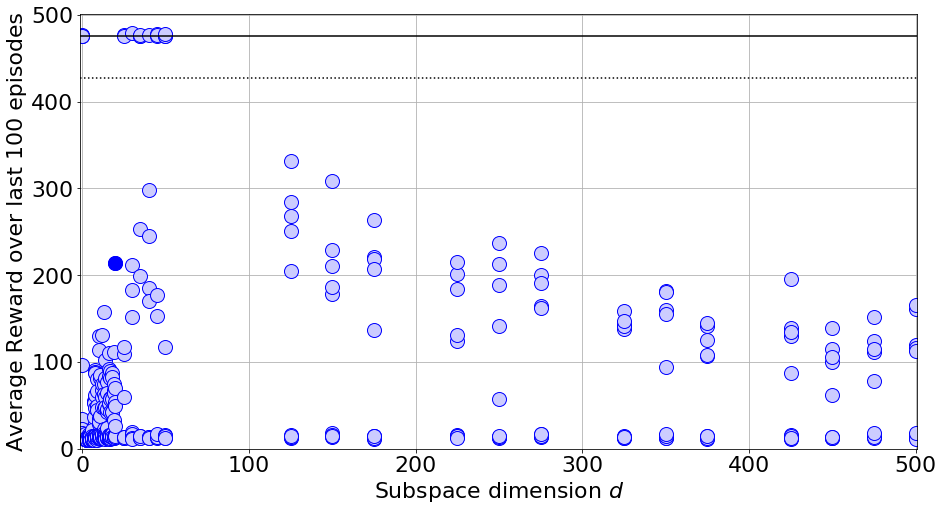

Log Scale:


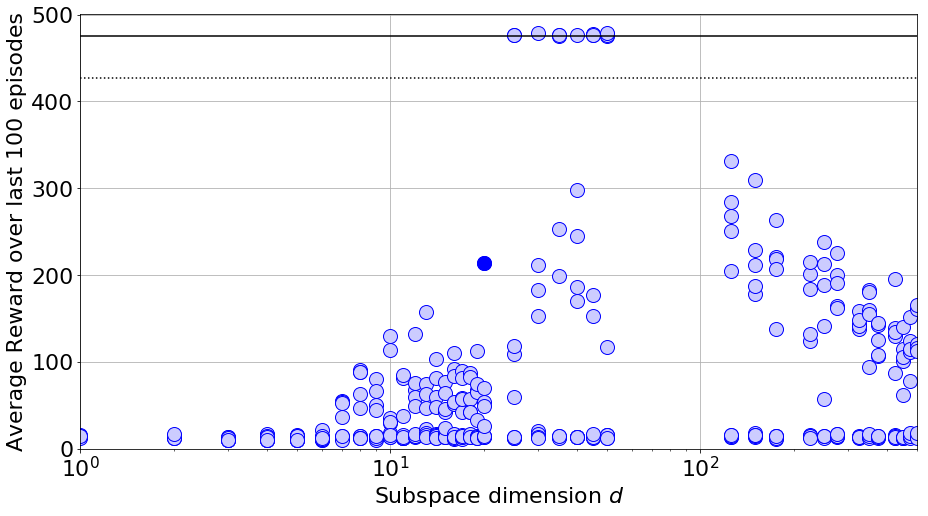

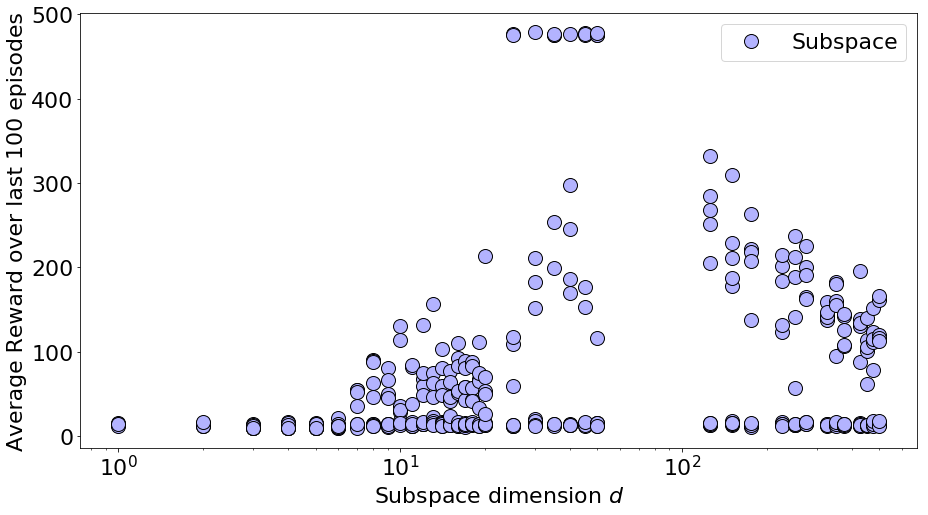

In [388]:
bl_ar = 475

print "Standard Scale:"
fig, ax = subplots(figsize=(15, 8) )

plot(Dim_, AR_, 'o', mec='b', mfc=(.8,.8,1) , ms=14)
plot(solved_dim, solved_ar, 'o', mec='b', mfc='b', ms=14)

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_ylim(0.0, 501)
ax.set_xlim(-1, 501)
plt.grid()
plt.show()


print "Log Scale:"
fig, ax = subplots(figsize=(15, 8) )              
semilogx(Dim_, AR_,  'o', mec='b', mfc=(.8,.8,1) , ms=14 )
semilogx(solved_dim, solved_ar,  'o', mec='b', mfc='b', ms=14 )

axhline(bl_ar, ls='-', color='k',label='baseline')
axhline(bl_ar * .9, ls=':', color='k',label='solved')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
# ax.set_title('Best 100-episode average reward')
ax.set_xscale('log')
ax.set_ylim(0.0, 501)
ax.set_xlim(-1, 501)
# ax.xaxis.set_ticks(np.arange(0,201,1))
plt.grid()


fig, ax = subplots(figsize=(15, 8) )

font = {'size'   : 22}
matplotlib.rc('font', **font)


# semilogx(Dim_, AR_, 'o', mfc=(.8,.8,.8), mec='k', ms=14, label='Direct')
semilogx(Dim_, AR_, 'o', mfc=(.7,.7,1), mec='k', ms=14, label='Subspace')

ax.set_xlabel('Subspace dimension $d$')
ax.set_ylabel('Average Reward over last 100 episodes')
plt.legend()
# savefig('figs/mnist_trainable_maxd_cmp_log.pdf', bbox_inches='tight')

In [281]:
Dim, AR, NE = [],[],[]

results_dir = '/home/users/chunyuan.li/cli/lab0/exp/low_rank_basis/results/dqn_results_temp'
version = 3
width = 20
repeat = 1
Dim_, AR_, NE_= extract_dim_reward_opus(results_dir, version, width, repeat)


Number of diary files extracted: 13
Number of subspaces tested: 13
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
13


In [282]:
AR_

[39.39, 40.66, 46.37, 55.21, 48.7, 50.43, 117.89, 195.51, 55.66, 48.46, 195.05]

In [283]:
NE_

[10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 4156.0,
 10000.0,
 10000.0,
 9858.0]

In [6]:
def plot_figure_easy_cartpole(results_dir, version, width, repeat):

    Dim_, AR_, NE_= extract_dim_reward_opus(results_dir, version, width, repeat)

    idx = sorted(range(len(Dim_)), key=lambda k: Dim_[k])
    Dim_ = sorted(Dim_)
    AR_ = [AR_[i] for i in idx]
    NE_ = [NE_[i] for i in idx]
    # print Dim_400

    Dim = sorted(list(set(Dim_)))
    # print Dim


    for i in range(len(Dim_)):
        if AR_[i]>195.0 and i>10:
            solved_dim, solved_ar = Dim_[i], AR_[i]
            print Dim_[i]
            print AR_[i]

            break

    AR_mean, AR_std = [], [] 
    for d in Dim:
        # print d
        ar_ = np.array([AR_[i] for i,x in enumerate(Dim_) if x==d])
        AR_mean.append(ar_.mean())
        AR_std.append(ar_.std())
    AR_mean, AR_std = np.array(AR_mean), np.array(AR_std)        
    print   AR_mean          


    # plot the figure
    bl_ar = 195.0

    fig, ax = subplots(figsize=(15, 8) )   

    font = {'size'   : 22}
    matplotlib.rc('font', **font)

    plot_direct_bias = -3
    direct_data_dim = [Dim_[d]+plot_direct_bias for d in range(len(Dim_)) if Dim_[d]==0 ]
    direct_data_ar = [AR_[d] for d in range(len(Dim_)) if Dim_[d]==0 ]
    subspace_data_dim = [Dim_[d] for d in range(len(Dim_)) if Dim_[d]!=0 ]
    subspace_data_ar = [AR_[d] for d in range(len(Dim_)) if Dim_[d]!=0 ]    
    # print direct_data
    plot(subspace_data_dim, subspace_data_ar, 'o', mfc=(.7,.7,1), mec='k', ms=14, label='Subspace')
    plot(solved_dim, solved_ar,  'o', mec='b', mfc='b', ms=14 )
    plot(direct_data_dim, direct_data_ar, 'o', mfc=(.8,.8,.8), mec='k', ms=14, label='Direct')
    
    xticks([plot_direct_bias,0,5,10,15,20,25,30]+[solved_dim], ['Direct','0','5','10','15','20','25','30']+[str(solved_dim)])
    ax.set_xlim(plot_direct_bias-1, 31)
    ax.set_xlabel('Subspace dimension $d$')
    ax.set_ylabel('Average Reward over last 100 episodes')
    
    # major ticks every 20, minor ticks every 5                                      
    major_ticks = np.arange(0, 200, 50)                                              
    minor_ticks = np.arange(0, 30, 5)                                               
                                                      
    ax.set_xticks(minor_ticks, minor=True)                                                                                                
    ax.set_yticks(major_ticks, minor=True)                                           

    # and a corresponding grid                                                       
    ax.grid(which='both')                                                            

    # or if you want differnet settings for the grids:                               
    ax.grid(which='minor', alpha=0.2)                                                
    
    if version == 2:
        ax.set_title('CartPole (Angle only): '+'width '+ str(width) +', depth 2')
    elif version == 3:
        ax.set_title('CartPole (Interval only): '+'width '+ str(width) +', depth 2')
    plt.legend(loc=4)
    savefig('figs/dqn_cartpole_easy/dqn_cartpole_v'+str(version)+'_width_'+str(width)+'.pdf', bbox_inches='tight')

Number of diary files extracted: 322
Number of subspaces tested: 31
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
312
10
195.41
[ 195.291         9.918        21.43909091    9.974        13.708        13.688
   12.201        35.428        79.018        50.37         58.707        74.551
   63.592        70.175        89.252        60.217        67.76         95.204
   86.854       133.108        84.66545455   77.123       162.438       177.199
  165.425       195.259       195.388       195.424       195.441       185.124
  195.305     ]
Number of diary files extracted: 311
Number of subspaces tested: 32
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 400]
311
15
195.13
[ 195.308    9.921   14.014   32.671   25.981   27.085   17.145   16.689
   47.215   30.055   29.242   62.737   40.009   50.953   79.133   93.406
   77.851   74.611  130.245  108.481  1

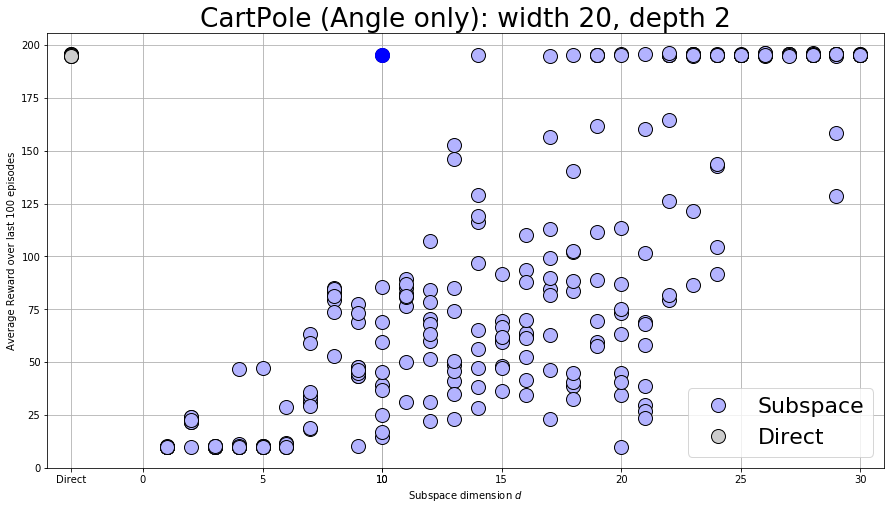

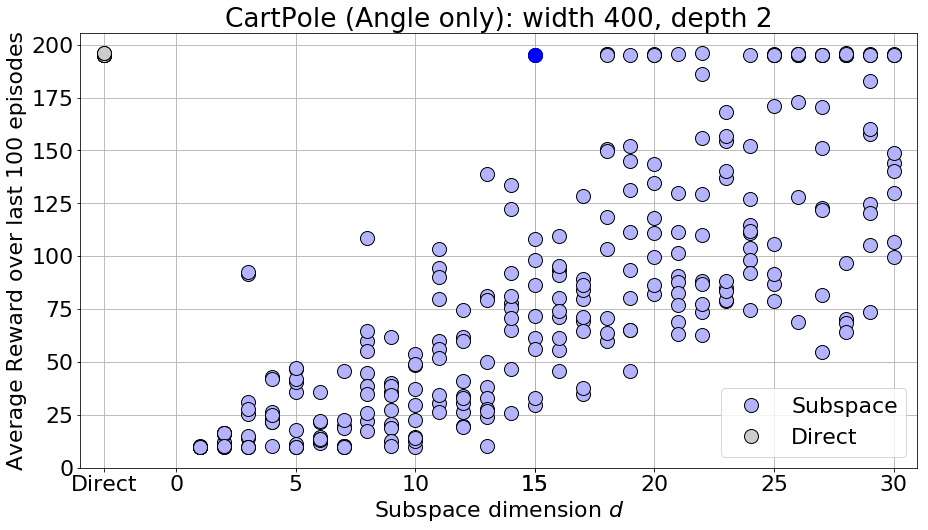

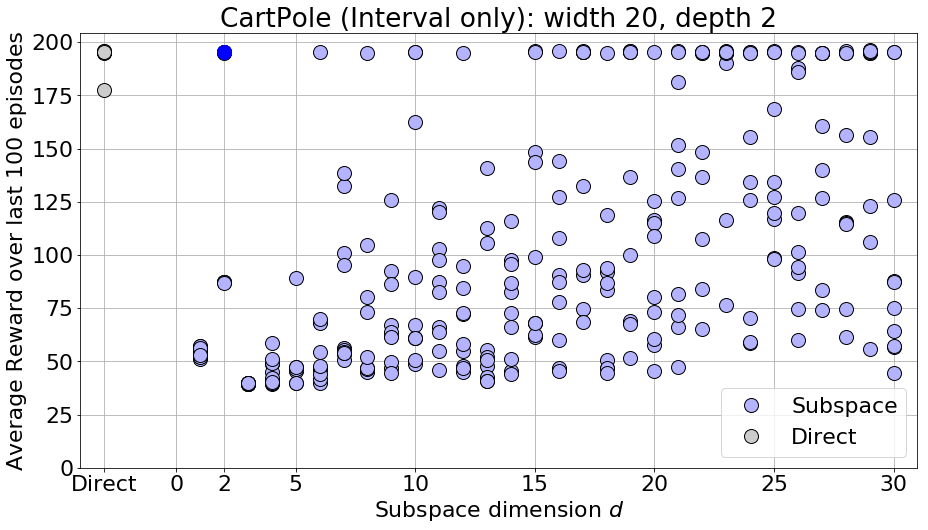

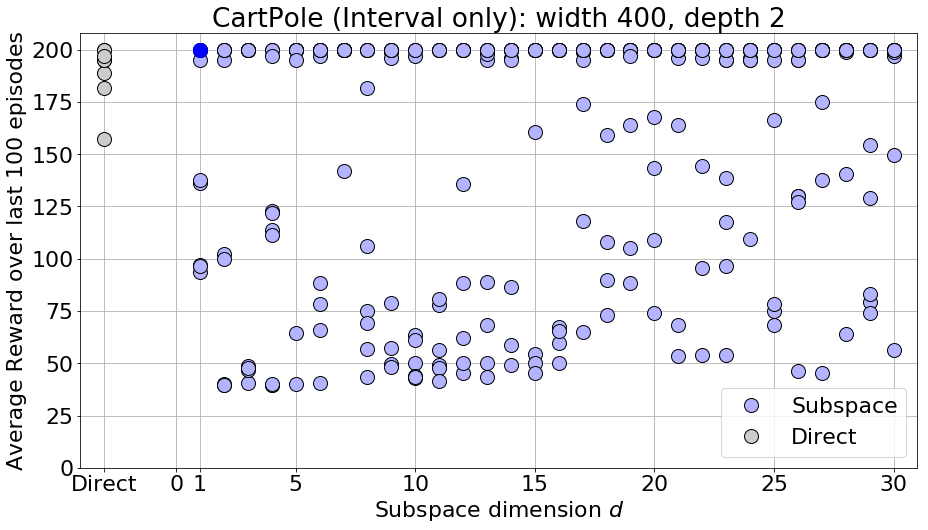

In [7]:
results_dir = '/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy'

directory = 'figs/dqn_cartpole_easy'
if not os.path.exists(directory):
    os.makedirs(directory)

version, width, repeat = 2, 20, 5
plot_figure_easy_cartpole(results_dir, version, width, repeat)


version, width, repeat = 2, 400, 5
plot_figure_easy_cartpole(results_dir, version, width, repeat)


version, width, repeat = 3, 20, 5
plot_figure_easy_cartpole(results_dir, version, width, repeat)

version, width, repeat = 3, 400, 5
plot_figure_easy_cartpole(results_dir, version, width, repeat)


Number of diary files extracted: 250
Number of subspaces tested: 25
[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
250
['/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy/171024_044014_3785140_lrb_fnn_CartPole-v3_0_400_1/diary', '/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy/171024_214000_e5ef5c7_lrb_fnn_CartPole-v3_0_400_1/diary', '/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy/171024_051754_3785140_lrb_fnn_CartPole-v3_0_400_2/diary', '/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy/171024_221012_d9a055c_lrb_fnn_CartPole-v3_0_400_2/diary', '/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy/171024_055528_3785140_lrb_fnn_CartPole-v3_0_400_3/diary', '/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy/171024_224356_82b45a3_lrb_fnn_CartPole-v3_0_400_3/diary', '/home/users/chunyuan.li/public_results/chun/rl_results/dqn_cps_easy/171

3
200.0
[ 190.637  138.357  118.647  169.96   147.012  194.195  133.23   142.892
  110.229  115.353  138.205  144.392  158.531  151.075  169.43   168.162
  169.018  159.726  189.611  158.353  162.333  175.833  180.343  152.009
  180.208]


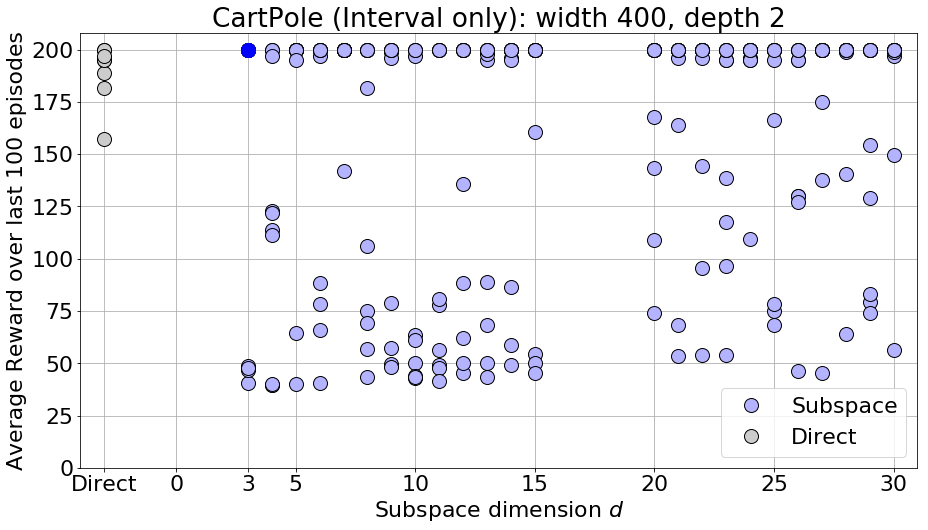

In [373]:
version, width, repeat = 3, 400, 5
plot_figure_easy_cartpole(results_dir, version, width, repeat)